## Importing packages

In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 632.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.4/715.4 kB 5.3 MB/s eta 0:00:00


In [ ]:
import ultralytics
from ultralytics import YOLO
import cv2
from PIL import Image
from IPython.display import Video
import matplotlib.pyplot as plt
from IPython.display import display
import torch
ultralytics.checks()

Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5432.0/8062.4 GB disk)


## Model selection and training

In [ ]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 71.0MB/s]


In [ ]:
results = model.train(data='/kaggle/input/anpr-data/data.yaml', epochs=100, imgsz=1728)

Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/anpr-data/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=1728, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 14.1MB/s]
2024-02-20 20:36:49,609	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-02-20 20:36:50,585	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-02-20 20:36:54.591963: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 20:36:54.592059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 20:36:54.860320: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/anpr-data/train/labels... 1350 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1350/1350 [00:09<00:00, 148.89it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/anpr-data/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/anpr-data/valid/labels... 129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 129/129 [00:00<00:00, 158.14it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/anpr-data/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1728 train, 1728 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      15.2G      1.473      6.533      1.587          9       1728: 100%|██████████| 85/85 [01:39<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.26s/it]

                   all        129        129      0.852      0.837      0.863      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      13.9G      1.534      3.997      1.567         10       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        129        129      0.783      0.729      0.797      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100        14G      1.591      2.606      1.603          8       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all        129        129      0.669      0.597      0.608      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100        14G       1.61      1.856      1.594         11       1728: 100%|██████████| 85/85 [01:34<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all        129        129      0.853      0.775      0.822      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100        14G      1.597      1.422      1.578         10       1728: 100%|██████████| 85/85 [01:33<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        129        129      0.839      0.798      0.801      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      13.9G      1.545      1.228      1.542          9       1728: 100%|██████████| 85/85 [01:33<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        129        129      0.871       0.69      0.804       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      13.9G       1.56       1.12      1.536          8       1728: 100%|██████████| 85/85 [01:35<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.849      0.742      0.821      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      13.9G      1.482      1.036      1.484          9       1728: 100%|██████████| 85/85 [01:36<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        129        129      0.845      0.842      0.869      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100        14G      1.491      1.009       1.48          7       1728: 100%|██████████| 85/85 [01:36<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.856      0.827       0.89       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      13.9G      1.498     0.9769      1.484          9       1728: 100%|██████████| 85/85 [01:34<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.882      0.853      0.892      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      13.9G      1.482     0.9544      1.464         12       1728: 100%|██████████| 85/85 [01:36<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        129        129      0.812      0.838      0.883      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      13.9G      1.446     0.8911      1.452         12       1728: 100%|██████████| 85/85 [01:36<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        129        129      0.948      0.814      0.896      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      13.9G       1.43      0.883      1.432         12       1728: 100%|██████████| 85/85 [01:34<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.932      0.829       0.88      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        14G      1.441     0.8881      1.464          7       1728: 100%|██████████| 85/85 [01:36<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.944      0.783      0.853       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      13.9G      1.435     0.8722      1.449          9       1728: 100%|██████████| 85/85 [01:37<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        129        129      0.948      0.822      0.895      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      13.9G      1.433     0.8532      1.434          9       1728: 100%|██████████| 85/85 [01:36<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.927      0.829      0.916      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      13.9G      1.382      0.802      1.408         15       1728: 100%|██████████| 85/85 [01:37<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        129        129      0.982      0.835      0.891      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      13.9G      1.394     0.8096      1.414         13       1728: 100%|██████████| 85/85 [01:35<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.942      0.806      0.897      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      13.9G      1.379     0.7999      1.424          8       1728: 100%|██████████| 85/85 [01:35<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.956       0.85      0.916      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        14G      1.368     0.7791      1.388          6       1728: 100%|██████████| 85/85 [01:35<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        129        129      0.912       0.86      0.931      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      13.9G      1.356     0.7524      1.405          9       1728: 100%|██████████| 85/85 [01:34<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        129        129      0.927       0.86      0.916      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      13.9G      1.372     0.7373      1.385         10       1728: 100%|██████████| 85/85 [01:34<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        129        129      0.962      0.822       0.89       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      13.9G      1.373     0.7487      1.387          7       1728: 100%|██████████| 85/85 [01:36<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        129        129       0.93      0.825      0.917      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      13.9G       1.32     0.7363      1.362          8       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        129        129      0.924      0.845      0.908      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100        14G      1.313     0.7085      1.367          7       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        129        129      0.958      0.829      0.909      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      13.9G      1.355     0.7077      1.393         12       1728: 100%|██████████| 85/85 [01:34<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        129        129      0.864      0.868      0.916      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      13.9G      1.355     0.7269      1.371         10       1728: 100%|██████████| 85/85 [01:36<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        129        129       0.94      0.857      0.923      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      13.9G      1.307     0.6799      1.351          9       1728: 100%|██████████| 85/85 [01:36<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        129        129      0.957       0.86      0.917      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      13.9G      1.296     0.6978      1.357          6       1728: 100%|██████████| 85/85 [01:33<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        129        129       0.97      0.845       0.93      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      13.9G      1.276     0.6939      1.332         11       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        129        129      0.971      0.845      0.902      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100        14G      1.255     0.6848      1.312         13       1728: 100%|██████████| 85/85 [01:37<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        129        129      0.948      0.841      0.925      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      13.9G      1.245     0.6728      1.326         10       1728: 100%|██████████| 85/85 [01:37<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        129        129      0.965      0.844      0.909      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      13.9G       1.26     0.6573      1.327          7       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        129        129      0.934      0.876      0.923      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      13.9G      1.238     0.6483      1.323         12       1728: 100%|██████████| 85/85 [01:34<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.956      0.814      0.909      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      13.9G      1.247     0.6457      1.322          8       1728: 100%|██████████| 85/85 [01:38<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        129        129      0.929      0.845      0.923      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      13.9G      1.242     0.6461      1.318          6       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        129        129      0.889      0.866      0.907      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      13.9G      1.219     0.6185       1.31          8       1728: 100%|██████████| 85/85 [01:35<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        129        129      0.947      0.868      0.922      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      13.9G      1.218     0.6346      1.308          8       1728: 100%|██████████| 85/85 [01:37<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        129        129      0.947      0.868      0.931      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      13.9G      1.203     0.6213      1.301         10       1728: 100%|██████████| 85/85 [01:36<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        129        129      0.941      0.858      0.927       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      13.9G      1.228     0.6203      1.318          8       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        129        129      0.941      0.868      0.935      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      13.9G      1.211     0.6103      1.281         10       1728: 100%|██████████| 85/85 [01:35<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        129        129      0.956      0.849      0.927      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      13.9G      1.216      0.611      1.313         10       1728: 100%|██████████| 85/85 [01:35<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        129        129      0.942       0.86      0.935      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100        14G      1.207     0.6111      1.281         11       1728: 100%|██████████| 85/85 [01:35<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        129        129      0.956      0.847      0.938      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100        14G      1.184     0.5998      1.265         11       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        129        129      0.965      0.867      0.935      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      13.9G      1.183     0.5943      1.275          9       1728: 100%|██████████| 85/85 [01:34<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.952      0.868      0.915      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      13.9G      1.171     0.5833      1.266         12       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        129        129      0.949       0.86      0.924      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100        14G       1.15     0.5793      1.251          9       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        129        129      0.934      0.876      0.932      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      13.9G      1.137     0.5732      1.259         10       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        129        129      0.967       0.86      0.927      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      13.9G      1.151     0.5791      1.251         10       1728: 100%|██████████| 85/85 [01:33<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        129        129      0.935       0.86      0.939      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      13.9G      1.121     0.5589      1.237          9       1728: 100%|██████████| 85/85 [01:33<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        129        129      0.928      0.899      0.927      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      13.9G      1.125      0.565      1.236          7       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        129        129      0.934      0.872      0.922      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      13.9G      1.098     0.5574      1.238         12       1728: 100%|██████████| 85/85 [01:39<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.947      0.853      0.922      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100        14G      1.104     0.5569       1.22         10       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        129        129      0.947      0.868      0.926      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100        14G      1.104     0.5561      1.237         11       1728: 100%|██████████| 85/85 [01:36<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        129        129      0.965      0.867      0.928      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      13.9G      1.108     0.5654      1.238          7       1728: 100%|██████████| 85/85 [01:36<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        129        129      0.942       0.86      0.918       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      13.9G      1.085     0.5359      1.221          9       1728: 100%|██████████| 85/85 [01:35<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        129        129      0.936      0.911      0.947      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      13.9G      1.067     0.5434      1.218         11       1728: 100%|██████████| 85/85 [01:38<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        129        129      0.927       0.89      0.927      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100        14G      1.075     0.5219      1.214          8       1728: 100%|██████████| 85/85 [01:38<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        129        129      0.942      0.889      0.932      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      13.9G      1.055     0.5312      1.203          9       1728: 100%|██████████| 85/85 [01:39<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        129        129      0.954      0.876      0.926      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      13.9G      1.056     0.5228      1.198          8       1728: 100%|██████████| 85/85 [01:39<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        129        129      0.949      0.859      0.922      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      13.9G      1.061     0.5206      1.201          9       1728: 100%|██████████| 85/85 [01:38<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        129        129      0.955      0.837      0.917      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      13.9G      1.032     0.5081      1.198          7       1728: 100%|██████████| 85/85 [01:37<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        129        129      0.957      0.858      0.925      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      13.9G      1.054     0.5184      1.204         13       1728: 100%|██████████| 85/85 [01:37<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        129        129      0.961       0.86      0.936      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      13.9G      1.048     0.5244      1.196          8       1728: 100%|██████████| 85/85 [01:36<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        129        129       0.95      0.845       0.92      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      13.9G      1.024      0.505      1.184          8       1728: 100%|██████████| 85/85 [01:36<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        129        129      0.953      0.876      0.945      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      13.9G     0.9912     0.4987      1.171         13       1728: 100%|██████████| 85/85 [01:36<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        129        129      0.946       0.86      0.925      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      13.9G      1.009     0.4994       1.18          9       1728: 100%|██████████| 85/85 [01:37<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        129        129      0.956      0.849      0.935      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      13.9G      1.022       0.51      1.182         11       1728: 100%|██████████| 85/85 [01:36<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        129        129      0.942      0.882       0.92        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      13.9G     0.9892     0.4834      1.173          8       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        129        129      0.952       0.86      0.934      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      13.9G     0.9776     0.4858      1.152          8       1728: 100%|██████████| 85/85 [01:37<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.954      0.876      0.925       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      13.9G     0.9627     0.4869      1.151          9       1728: 100%|██████████| 85/85 [01:36<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.975      0.868      0.928       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      13.9G      0.967     0.4859      1.171         11       1728: 100%|██████████| 85/85 [01:36<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        129        129      0.955       0.86      0.932      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      13.9G     0.9835     0.5065      1.164          8       1728: 100%|██████████| 85/85 [01:36<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        129        129      0.943      0.898      0.927      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      13.9G     0.9544     0.4814      1.146          7       1728: 100%|██████████| 85/85 [01:35<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        129        129      0.942      0.874      0.934      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      13.9G     0.9387     0.4783      1.149          9       1728: 100%|██████████| 85/85 [01:37<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        129        129      0.958      0.886      0.946      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100        14G     0.9394     0.4702      1.141          8       1728: 100%|██████████| 85/85 [01:36<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        129        129       0.95      0.899      0.938      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      13.9G     0.9356     0.4565      1.147         12       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        129        129       0.95      0.886      0.951      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100        14G     0.9231     0.4622       1.13          5       1728: 100%|██████████| 85/85 [01:35<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        129        129      0.934      0.875      0.921      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      13.9G     0.9082     0.4564      1.127          9       1728: 100%|██████████| 85/85 [01:36<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        129        129      0.966      0.874      0.947      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      13.9G     0.9272     0.4493       1.12         11       1728: 100%|██████████| 85/85 [01:38<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.965      0.867      0.944      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      13.9G     0.8932     0.4551      1.117          7       1728: 100%|██████████| 85/85 [01:36<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.928      0.899      0.924      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      13.9G      0.921     0.4707      1.139          9       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

                   all        129        129       0.95      0.868      0.938      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      13.9G      0.899     0.4342      1.116         13       1728: 100%|██████████| 85/85 [01:35<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        129        129       0.92       0.89      0.928      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      13.9G     0.8741     0.4309      1.106          7       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        129        129      0.974       0.86      0.944      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      13.9G     0.8797      0.448      1.098         11       1728: 100%|██████████| 85/85 [01:35<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.954       0.86      0.933      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      13.9G      0.868     0.4331      1.106         10       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        129        129      0.914      0.904       0.94      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      13.9G     0.8461     0.4348      1.092          7       1728: 100%|██████████| 85/85 [01:34<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        129        129      0.936      0.904      0.934      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      13.9G     0.8458     0.4242      1.105          9       1728: 100%|██████████| 85/85 [01:35<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        129        129      0.958      0.884      0.946      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      13.9G     0.8442     0.4243       1.08          9       1728: 100%|██████████| 85/85 [01:36<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        129        129      0.922      0.915      0.949      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      13.9G     0.8399     0.4211       1.09          8       1728: 100%|██████████| 85/85 [01:37<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        129        129      0.949      0.884       0.94      0.617


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      15.2G     0.8468     0.3794      1.097          5       1728: 100%|██████████| 85/85 [01:33<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        129        129       0.95      0.883       0.94      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100        14G      0.815     0.3649      1.088          6       1728: 100%|██████████| 85/85 [01:26<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        129        129      0.947      0.899      0.939      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      13.9G     0.7939     0.3581      1.072          6       1728: 100%|██████████| 85/85 [01:26<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        129        129      0.963      0.899      0.942      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      13.9G     0.7688     0.3466       1.05          6       1728: 100%|██████████| 85/85 [01:27<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

                   all        129        129      0.953      0.884      0.938      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      13.9G     0.7771     0.3522       1.06          6       1728: 100%|██████████| 85/85 [01:26<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        129        129      0.936      0.902      0.936      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100        14G     0.7825     0.3525      1.049          7       1728: 100%|██████████| 85/85 [01:27<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        129        129      0.936      0.914      0.944      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100        14G       0.75     0.3452      1.044          6       1728: 100%|██████████| 85/85 [01:29<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        129        129      0.966      0.885      0.939      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      13.9G     0.7514     0.3397       1.05          6       1728: 100%|██████████| 85/85 [01:31<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        129        129      0.942      0.887      0.944      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      13.9G     0.7542     0.3381      1.048          6       1728: 100%|██████████| 85/85 [01:32<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        129        129      0.936      0.905      0.944      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100        14G     0.7531     0.3416      1.046          6       1728: 100%|██████████| 85/85 [01:31<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        129        129      0.914      0.911      0.943      0.632



100 epochs completed in 2.784 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]


                   all        129        129      0.914      0.912      0.943      0.633
Speed: 1.4ms preprocess, 15.7ms inference, 0.0ms loss, 8.5ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model.export()

Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 1728, 1728) BCHW and output shape(s) (1, 5, 61236) (6.3 MB)

TorchScript: starting export with torch 2.1.2...
TorchScript: export success ✅ 4.8s, saved as 'runs/detect/train/weights/best.torchscript' (12.5 MB)

Export complete (7.9s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=1728  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=1728 data=/kaggle/input/anpr-data/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.torchscript'

In [ ]:
model_2 = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

## Testing on unseen data

In [ ]:
test_result = model_2.predict(source='/kaggle/input/test-data/*.jpg')


image 1/4 /kaggle/input/test-data/423147702_702549078730868_70612992036539056_n.jpg: 1312x1728 1 license-plate, 87.2ms
image 2/4 /kaggle/input/test-data/426758593_1094667961772991_5556296754488120425_n.jpg: 1312x1728 1 license-plate, 26.6ms
image 3/4 /kaggle/input/test-data/two-2-audi-tts-cars-side-by-side-one-front-one-back-gold-and-black-CBNYMH.jpg: 1280x1728 3 license-plates, 80.3ms
image 4/4 /kaggle/input/test-data/why-are-number-plates-yellow-and-white.jpg: 1088x1728 1 license-plate, 75.8ms
Speed: 11.6ms preprocess, 67.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1728)


In [ ]:
img1 = test_result[0].plot()
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = Image.fromarray(img1)
img1 = img1.resize((400,400))
img2 = test_result[1].plot()
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = Image.fromarray(img2)
img2 = img2.resize((400,400))
img3 = test_result[2].plot()
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img3 = Image.fromarray(img3)
img3 = img3.resize((400,400))
img4 = test_result[3].plot()
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img4 = Image.fromarray(img4)
img4 = img4.resize((400,400))

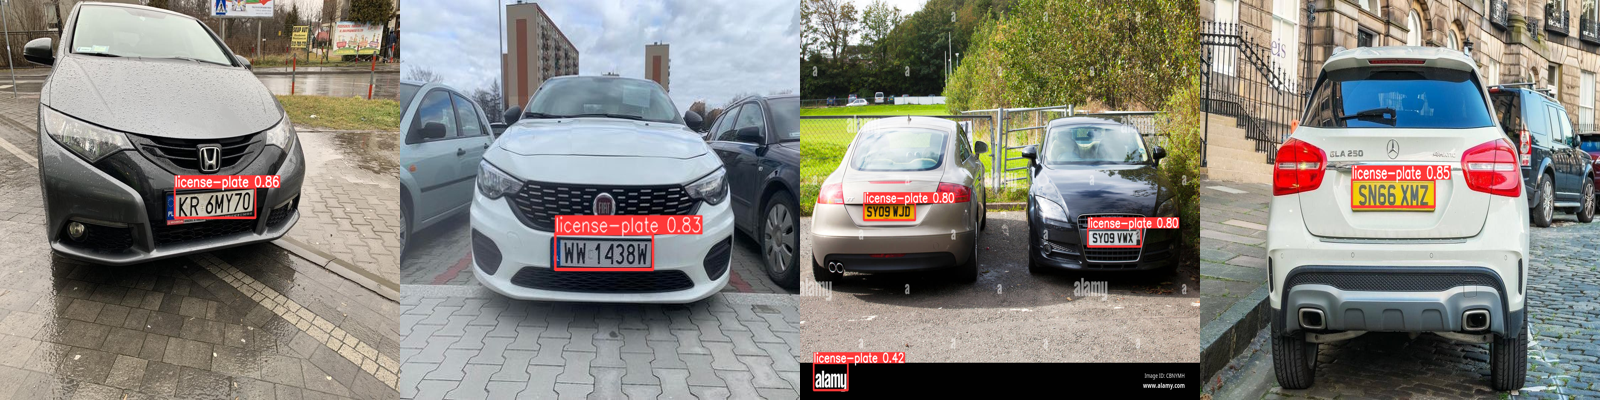

In [ ]:
total_width = img1.width + img2.width + img3.width + img4.width
max_height = max(img1.height, img2.height, img3.height,img4.height)
final_image = Image.new('RGB', (total_width, max_height))

# Paste resized images onto the final image
final_image.paste(img1, (0, 0))
final_image.paste(img2, (img1.width, 0))
final_image.paste(img3, (img1.width + img2.width, 0))
final_image.paste(img4, (img1.width + img2.width + img3.width, 0))

# Display the final image
display(final_image)

## Prediction from video

In [ ]:
test_vid = model_2.predict(source='/kaggle/input/test-data/Car_Traffic.mp4',save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/1800) /kaggle/input/test-data/Car_Traffic.mp4: 992x1728 (no detections), 68.4ms
video 1/1 (2/1800) /kaggle/input/test-data/Car_Traffic.mp4: 992x1728 1 license-plate, 20.5ms
video 1/1 (3/1800) /kaggle/input/test-data/Car_Traffic.mp4: 992x1728 (no detections), 20.6ms
video 1/1 (4/1800) /kaggle/input/test-data/Car_Traffic.mp4: 992x1728 (no detections), 20.5ms
video 1/1 (5/1800) /kaggle/input/test-data/Car_Traffic.mp4: 992x1728 (no detections)

In [ ]:
!ffmpeg -y -loglevel panic -i /kaggle/working/runs/detect/predict/Car_Traffic.avi output.mp4

In [ ]:
Video('output.mp4',width=1080)